### Introduction

__Source__: https://deeplizard.com/learn/video/EqpzfvxBx30

Data is the primary ingredient of deep learning, and although it’s our task as neural network programmers to let our neural networks learn from our data, we still have the responsibility of knowing the nature and history of the data we are using to actually do the training.

Computer programs in general consist of two primary components, __code__ and __data__. With traditional programming, the programmer’s job is to directly write the software or code, but with deep learning and neural networks, the software so to speak is the network itself and in particular, the network’s weights that emerge automatically during the training process. It’s the programmer’s job to oversee and guide the learning process though training. We can think of this as an indirect way of writing software or code. By using data and deep learning, neural network programmers can produce software capable of performing computations without writing code to explicitly carry out these computations.

For this reason, the role of data in developing software is shifting, and we’ll likely see the role of software developers shift as well.



__Data focused considerations:__

* Who created the dataset?
* How was the dataset created?
* What transformations were used?
* What intent does the dataset have?
* Possible unintentional consequences?
* Is the dataset biased?
* Are there ethical issues with the dataset?

In practice, acquiring and accessing data is often of the hardest parts of deep learning, so keep this in mind as we go though this particular dataset. Take note of the general concepts and ideas that we see here.



### The machine learning pipeline

__Prepare the data__ -> Build the model -> Train the model -> Analyze the model's results

###  Extract, Transform, Load (ETL)

__Source__: https://deeplizard.com/learn/video/8n-TGaBZnk4.

__Data.__ MNIST dataset of 70,000 handwritten digits. Fashion-MNIST https://github.com/zalandoresearch/fashion-mnist.

To prepare data, we'll be following what is loosely known as an ETL process.

* __Extract__ data from a data source.
* __Transform__ data into a desirable format.
* __Load__ data into a suitable structure.

In our case: Get Fashion-MNIST from source -> Put our data into `tensor` form -> Put our data into an object to make it easily accessible (e.g. `DataLoader`).


An __abstract class__ is a Python class that has methods we must implement, so we can create a custom dataset by creating a subclass that extends the functionality of the Dataset class.

Creating a custom dataset in PyTorch is a two-step process: 
 1. Extend the `torch.utils.data.Dataset` class by creating a subclass that implements these required methods. 
 2. The new subclass is passed to the PyTorch `torch.utils.data.DataLoader` object. 
 
We will be using the fashion-MNIST dataset that comes built-in with the torchvision package, so we won’t have to do this for our project. Just know that the Fashion-MNIST built-in dataset class is doing this behind the scenes.

###  FashionMNIST

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim     # contains optimizers e.g. Adam, SGD
import torch.nn.functional as F # contains functional interface of typical operations used for building nn's

import torchvision
import torchvision.transforms as transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [146]:
# extract and transform
train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    download=True, # download if not on disk
    transform=transforms.ToTensor()) 
    # transforms can be piped: transforms.Compose([transforms.ToTensor(), ... ])

# load
train_loader = torch.utils.data.DataLoader(train_set,batch_size=10,shuffle=True)

Thus we have performed the two-step process mentioned above. Below we see that the essential property of `DataLoader` is that it allows one to iterate over batches of the data. 

#### Exploring a single image

In [26]:
len(train_set)

60000

In [27]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [28]:
train_set.targets.bincount() # balanced!

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

For class imbalance: https://arxiv.org/abs/1710.05381

In [29]:
# Show a single image in the train set
sample = next(iter(train_set))
image, label = sample

9


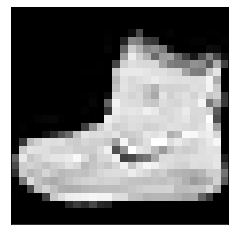

In [30]:
plt.imshow(image.squeeze(), cmap='gray')
plt.xticks([])
plt.yticks([])
print(label)

#### Exploring a single batch

In [31]:
# Explore a single batch from the dataloader
batch = next(iter(train_loader))
images, labels = batch

In [32]:
images.shape # rank-4 tensor

torch.Size([10, 1, 28, 28])

In [33]:
labels.shape # same length as batch size

torch.Size([10])

#### Grid of images

In [60]:
grid = torchvision.utils.make_grid(images, nrow=10) # batch_size=10
grid.shape

torch.Size([3, 32, 302])

In [71]:
grid[0].shape

torch.Size([32, 302])

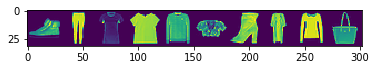

In [69]:
plt.imshow(grid[0])

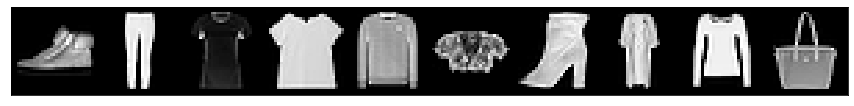

In [74]:
plt.figure(figsize=(15,15))
plt.imshow(grid.permute(1,2,0)) # swap first two axes first
plt.xticks([]), plt.yticks([]);

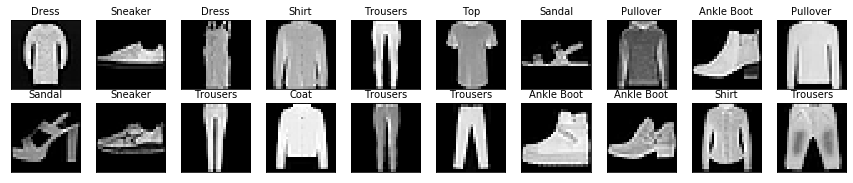

In [152]:
NUM_IMAGES = 20 # how many to plot

train_loader = torch.utils.data.DataLoader(
    train_set, 
    batch_size=1, 
    shuffle=True) # load data

mapping = {
    0:'Top', 1:'Trousers', 2:'Pullover', 3:'Dress', 4:'Coat',
    5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle Boot'}

plt.figure(figsize=(15,15)) # set figure
for i, batch in enumerate(train_loader, start=1): # start at i=1, since subplot is 1-indexed    
    image, label = batch                          # batch size=1 i.e. 1 image per batch.
    plt.subplot(10,10,i)                          # ith out of 100, arranged as 10x10
    plt.imshow(image.reshape(28,28), cmap='gray')
    
    plt.xticks([])
    plt.yticks([])
    plt.title(mapping[label.item()], fontsize=10)
    
    if (i >= NUM_IMAGES): 
        break
plt.show();

To understand the loop:

In [121]:
train_loader_enum = enumerate(train_loader)

In [122]:
a = next(train_loader_enum)

In [123]:
b = next(train_loader_enum)

In [124]:
i, batch = a 
images, labels = batch
print(i)
print(images.shape, labels.shape) # batch_size=1

0
torch.Size([1, 1, 28, 28]) torch.Size([1])


In [125]:
i, batch = b
images, labels = batch
print(i)
print(images.shape, labels.shape) # batch_size=1

1
torch.Size([1, 1, 28, 28]) torch.Size([1])


Each next pushes the index from 0, 1, and so on, as well as the next image in the `DataLoader`. The batch size is set to 1 to get individual images pushed. The `start_index=1` above makes the enumerate 1-indexed.

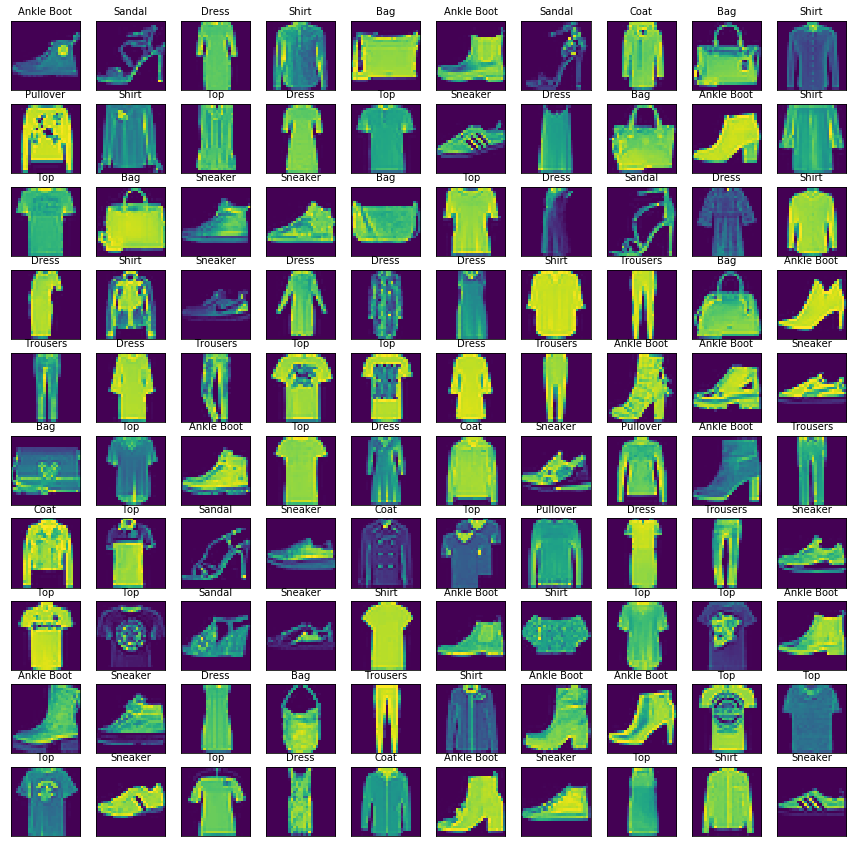

In [145]:
NUM_IMAGES = 100
train_load = torch.utils.data.DataLoader(train_set, batch_size=1, shuffle=True)
plt.figure(figsize=(15,15))
for i, batch in enumerate(train_load, start=1): # the dataloader is an iterable object
    images, labels = batch
    plt.subplot(10, 10, i)
    plt.imshow(images[0].squeeze())
    plt.xticks([])
    plt.yticks([])
    plt.title(mapping[labels.item()], fontsize=10)
    
    if i >= NUM_IMAGES:
        break  

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=10)


In [4]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)


In [5]:
len(train_set)

60000

In [6]:
train_set.train_labels

/home/chuankang-fan/miniconda3/envs/py312/lib/python3.12/site-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [7]:
sample = next(iter(train_set))

In [8]:
len(sample)

2

In [9]:
type(sample)

tuple

In [14]:
image, label = sample

In [15]:
image.shape

torch.Size([1, 28, 28])

In [16]:
label.shape

AttributeError: 'int' object has no attribute 'shape'

In [20]:
(image.squeeze()).shape

torch.Size([28, 28])

label: 9


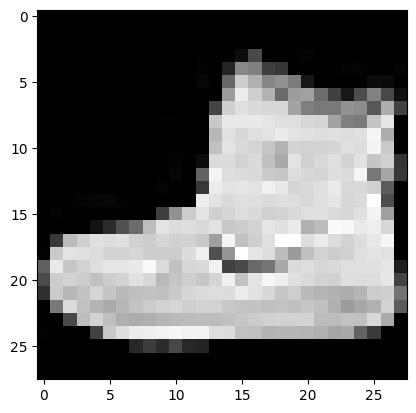

In [17]:
plt.imshow(image.squeeze(), cmap='gray')
print('label:', label)

In [21]:
batch = next(iter(train_loader))


In [22]:
len(batch)

2

In [23]:
type(batch)

list

In [24]:
images, labels = batch

In [25]:
images.shape

torch.Size([10, 1, 28, 28])

In [26]:
labels.shape

torch.Size([10])

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


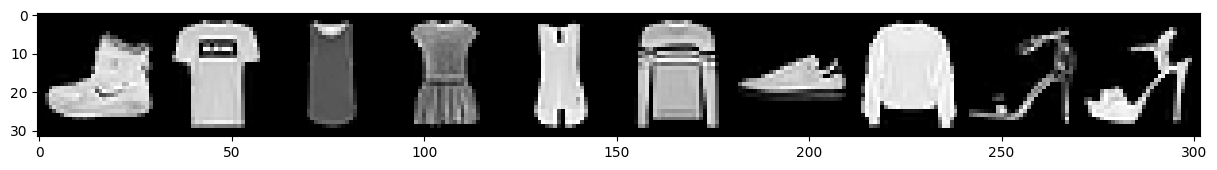

In [27]:
grid = torchvision.utils.make_grid(images, nrow=10) # batch_size=10

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print('labels:', labels)

In [31]:
grid.shape, np.transpose(grid, (1,2,0)).shape

(torch.Size([3, 32, 302]), torch.Size([32, 302, 3]))

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5,
        2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 1, 6, 3,
        1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7, 9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8])


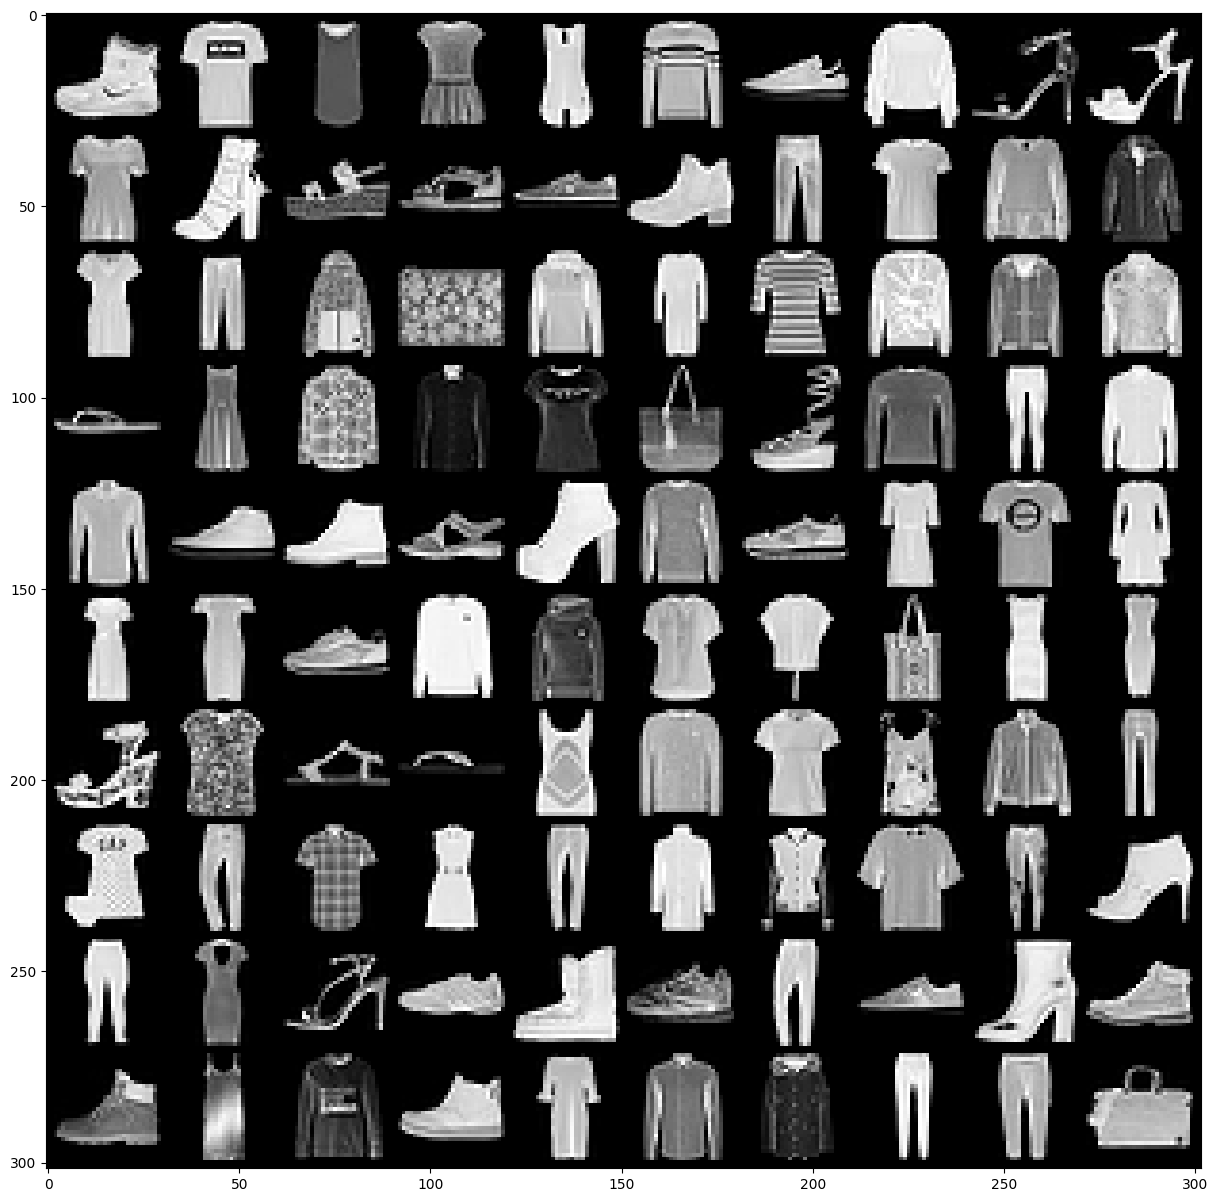

In [32]:
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=100
)

batch = next(iter(train_loader))
images, labels = batch

grid = torchvision.utils.make_grid(images, nrow=10) # batch_size=10

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print('labels:', labels)